# Code to Produce some Additional Visualization

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/k1/ypk5p6h57154zss_y_50gngw0000gn/T/ipykernel_85268/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Duplicate key in file '/Users/arjunrajpal/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


In [4]:
import ast

df = pd.read_csv('./data/emotions_data.csv')
# Convert 'emotions' and 'emotion_scores' to lists if they are not already
df['emotions'] = df['emotions'].apply(ast.literal_eval)
df['emotion_scores'] = df['emotion_scores'].apply(ast.literal_eval)

# Create 'emotion_label' column
df['emotion_label'] = df.apply(lambda row: row['emotions'][np.argmax(row['emotion_scores'])], axis=1)

source            emotion_label
"metrology news"  Concern          1
                  Optimism         2
01net             Concern          2
                  Optimism         2
10TV              Concern          1
                                  ..
헤럴드경제             Concern          1
헬로디디              Concern          1
                  Excitement       1
헬스경향              Concern          1
＠IT               Optimism         1
Length: 4555, dtype: int64


/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


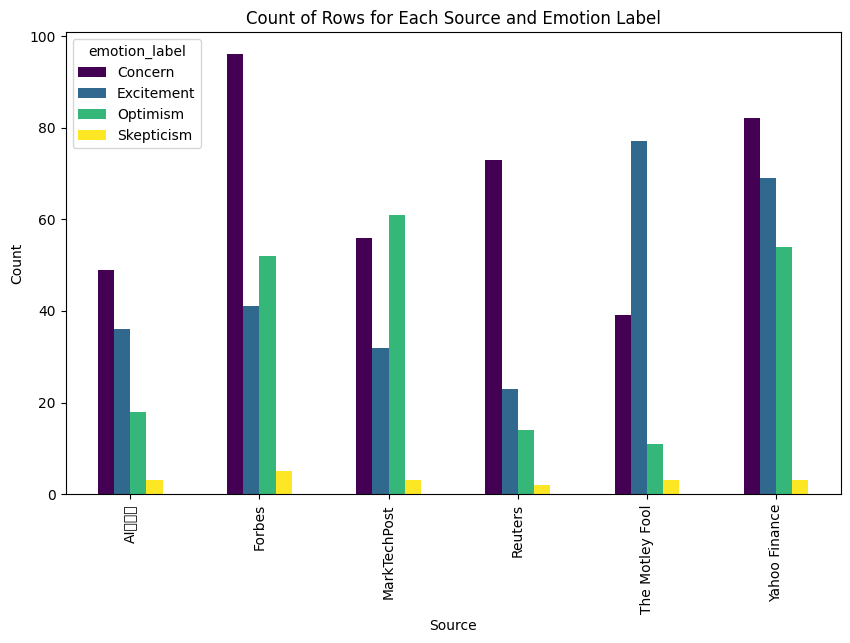

In [9]:
grouped_values = df.groupby(['source', 'emotion_label']).size()
print(grouped_values)

grouped_values = df.groupby(['source', 'emotion_label']).size()
mask = grouped_values.groupby(level=0).transform('sum') > 100

filtered_values = grouped_values[mask]

filtered_values.unstack().plot(kind='bar', stacked=False, colormap='viridis',figsize=(10, 6))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()